In [1]:
import cv2
import os
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_dir = '../dataset/test'
Classes = ['closed', 'open']
img_size = 128
training_data = []

In [3]:
def create_training_data():
    for category in Classes:
        path = os.path.join(train_dir, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
            backtorgb  = cv2.resize(backtorgb, (img_size,img_size))
            training_data.append([backtorgb, class_num])

In [4]:
create_training_data()

In [5]:
import random
import numpy as np
random.shuffle(training_data)

In [6]:
X_train = []
y_label = []
for features, label in training_data:
    X_train.append(features)
    y_label.append(label)

X_train = np.array(X_train)
X_train = X_train/255.0

y_label = np.array(y_label)

In [7]:
true_classes = y_label

In [8]:
def predict_model(model):
    predictions = model.predict(X_train).round()
    return np.max(predictions, axis=1)

In [9]:
def get_evaluation_matrics(predicted_classes):
    model_accuracy = accuracy_score(true_classes, predicted_classes)
    print(model_accuracy * 100)
    report = classification_report(true_classes, predicted_classes, target_names=['drowsy', 'non-drowsy'])
    print(report)

In [10]:
import itertools
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)
  
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [11]:
def plot_roc_curve(predicted_classes):
    fpr, tpr, threshold = metrics.roc_curve(true_classes, predicted_classes)
    roc_auc = metrics.auc(fpr, tpr)
        
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# evaluate Basic model

In [16]:
model = load_model('../models/cnnBasic.h5')

In [17]:
predicted_classes = predict_model(model)
get_evaluation_matrics(predicted_classes)

93.90088945362135
              precision    recall  f1-score   support

      drowsy       0.95      0.95      0.95       500
  non-drowsy       0.92      0.92      0.92       287

    accuracy                           0.94       787
   macro avg       0.93      0.93      0.93       787
weighted avg       0.94      0.94      0.94       787



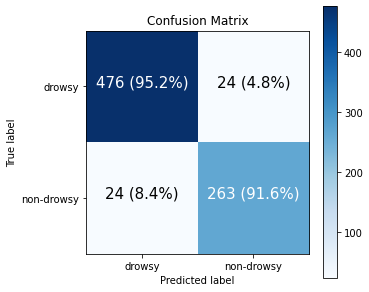

In [18]:
make_confusion_matrix(true_classes, predicted_classes, classes=['drowsy', 'non-drowsy'],
                      figsize=(5, 5),
                      text_size=15)

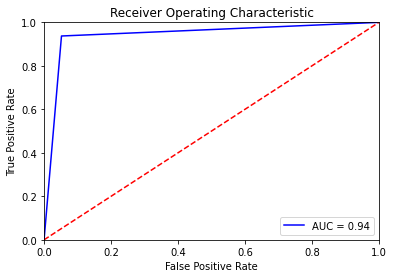

In [15]:
plot_roc_curve(predicted_classes)

# evaluate MobileNet

In [22]:
model = load_model('../models/mobileNet.h5')
predicted_classes = predict_model(model)
get_evaluation_matrics(predicted_classes)

98.89908256880734
              precision    recall  f1-score   support

      drowsy       0.99      0.99      0.99       362
  non-drowsy       0.98      0.98      0.98       183

    accuracy                           0.99       545
   macro avg       0.99      0.99      0.99       545
weighted avg       0.99      0.99      0.99       545



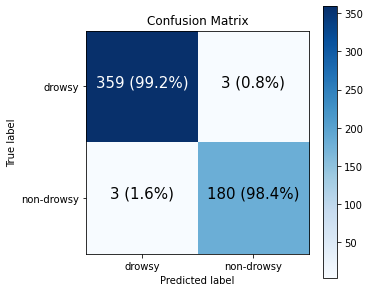

In [23]:
make_confusion_matrix(true_classes, predicted_classes, classes=['drowsy', 'non-drowsy'],
                      figsize=(5, 5),
                      text_size=15)

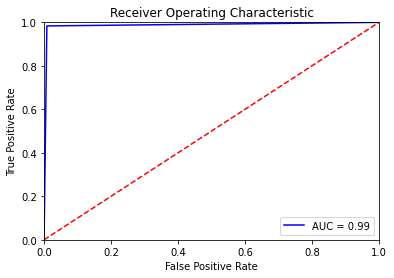

In [24]:
plot_roc_curve(predicted_classes)

# evaluate VGG

In [22]:
model = load_model('../models/VGG.h5')
predicted_classes = predict_model(model)
get_evaluation_matrics(predicted_classes)

96.18805590851333
              precision    recall  f1-score   support

      drowsy       0.98      0.96      0.97       500
  non-drowsy       0.94      0.96      0.95       287

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



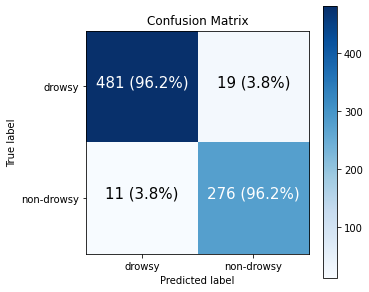

In [23]:
make_confusion_matrix(true_classes, predicted_classes, classes=['drowsy', 'non-drowsy'],
                      figsize=(5, 5),
                      text_size=15)

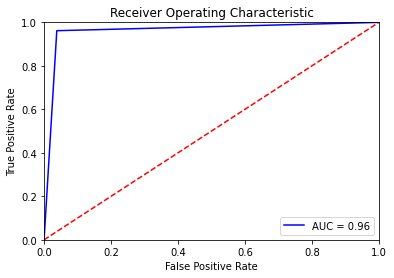

In [24]:
plot_roc_curve(predicted_classes)